# TP Conception et analyse d'expérience

Réalisé par Yohan Michelland et Marion Vertessen 

Dans le cadre de cette étude, nous avons le choix d'aggrégez toutes les données concernant le Condition 2 et de ne comparer que les différents types de claviers entre eux.

## Loading libraries and other dependencies

In [6]:
install.packages("afex") # For anovas
#install.packages("hrbrthemes")
install.packages("viridis") # For color-scales


  There is a binary version available but the source version is later:
     binary source needs_compilation
afex 0.28-1  1.0-1             FALSE



installing the source package 'afex'




  There is a binary version available but the source version is later:
        binary source needs_compilation
viridis  0.6.1  0.6.2             FALSE



installing the source package 'viridis'



In [7]:
# Data and stats libraries
library(tidyverse) # metapackage of all tidyverse packages
library(afex)       # for aov_ez()
library(parallel)   # for parLapply()

# Visualization libraries
library(ggplot2)
library(dplyr)
library(viridis)

# library(hrbrthemes)
# hrbrthemes::import_roboto_condensed() # to install Roboto, not necessary since web-based, just to remove error message.

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5       v purrr   0.3.4  
v tibble  3.1.2       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.4.0       v forcats 0.5.1  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lme4
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4
************
Welcome to afex. For support visit: http://afex.singmann.science/
- Functions for ANOVAs: aov_

## Chargement des données

In [51]:
data = read.csv('sample_data/data_typing.csv', sep=',')
head(data)

ParticipantID,TrialID,Block1,Block2,Condition1,Condition2,wpm,erreurs,Correct.words,Keystrokes,TÃ.lÃ.phone
1,1,1,1,Gesture_Gboard,Deux_mains,15,1,8,32,Samsung A7
1,2,1,1,Gesture_Gboard,Deux_mains,27,2,14,70,Samsung A7
1,3,1,1,Gesture_Gboard,Deux_mains,26,0,12,63,Samsung A7
1,4,1,2,Gesture_Gboard,Main_dominante,19,4,10,41,Samsung A7
1,5,1,2,Gesture_Gboard,Main_dominante,28,2,16,78,Samsung A7
1,6,1,2,Gesture_Gboard,Main_dominante,29,0,18,74,Samsung A7


## Visualisation des données

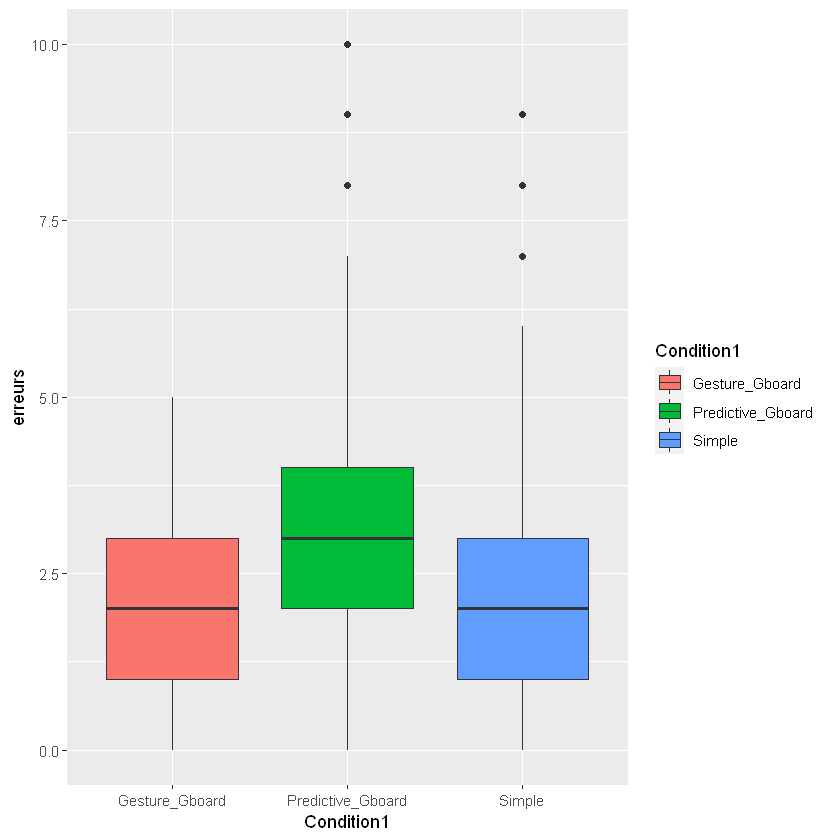

In [52]:
ggplot(data, aes(x=Condition1, y=erreurs, fill=Condition1)) +
  geom_boxplot() 

Il semble que le predictive Gboard provoque significativement induire plus d'erreurs que les deux autres alternatives

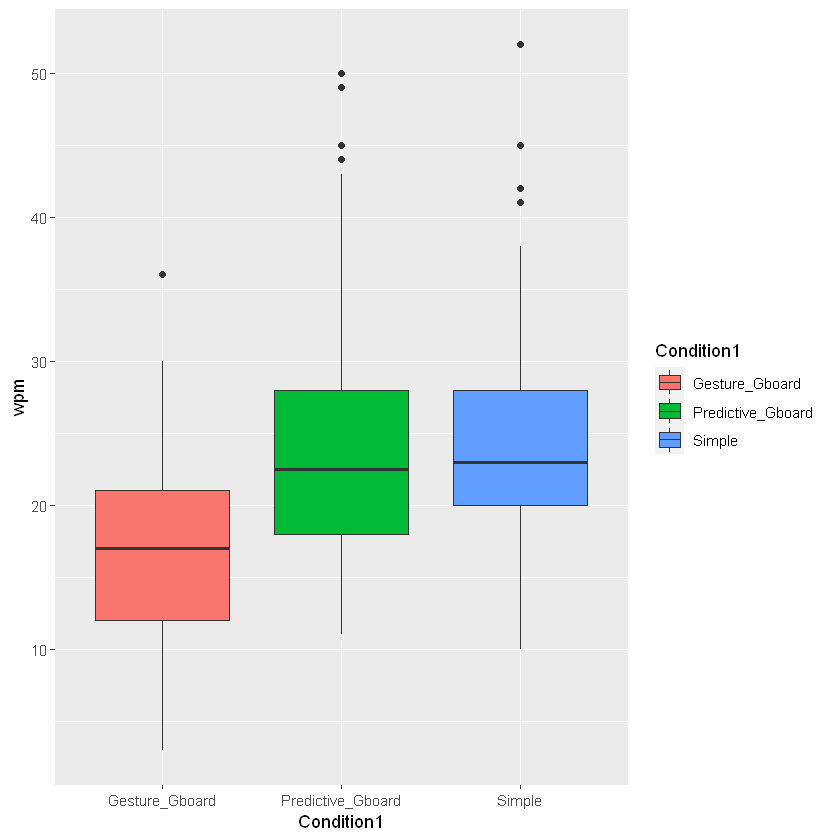

In [53]:
ggplot(data, aes(x=Condition1, y=wpm, fill=Condition1)) +
  geom_boxplot() 

Il semble que le Gesture gBoard induit un plus petit nombre d'action par minute chez l'utilisateur.

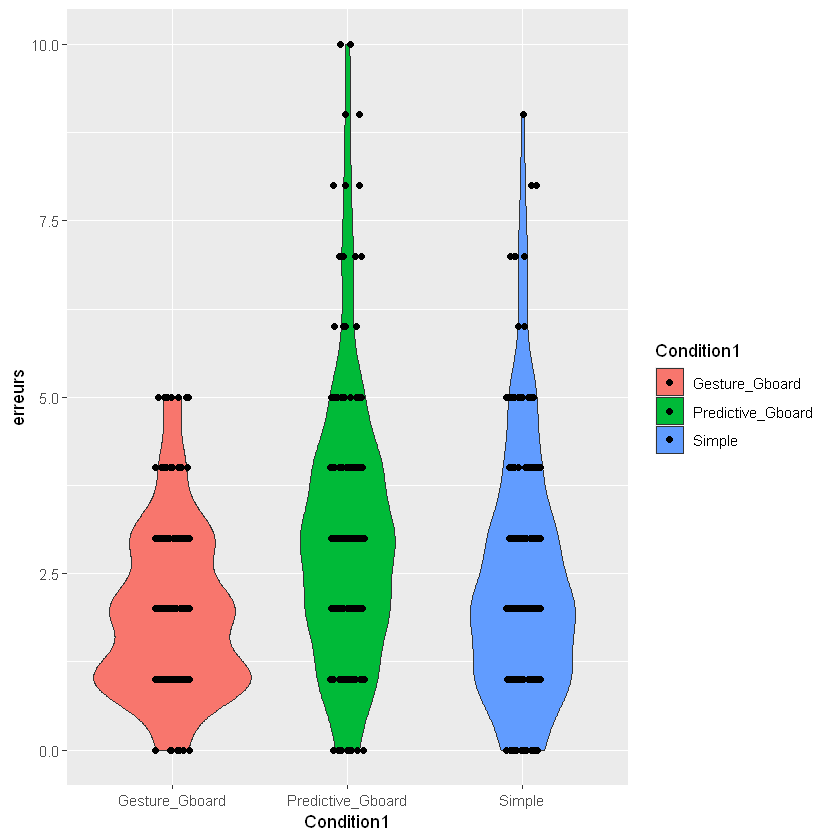

In [54]:
ggplot(data, aes(x=Condition1, y=erreurs, fill=Condition1)) + 
  geom_violin() + geom_jitter(height = 0, width = 0.1)

On remarque que l'écart d'erreurs entre Gesture GBoard et les autres n'est pas si grand et s'explique par le fait que très peu de gens on eu un grand nombres d'erreurs avec le Gesture Gboard (ce qui n'est pas le cas avec les deux autres claviers)

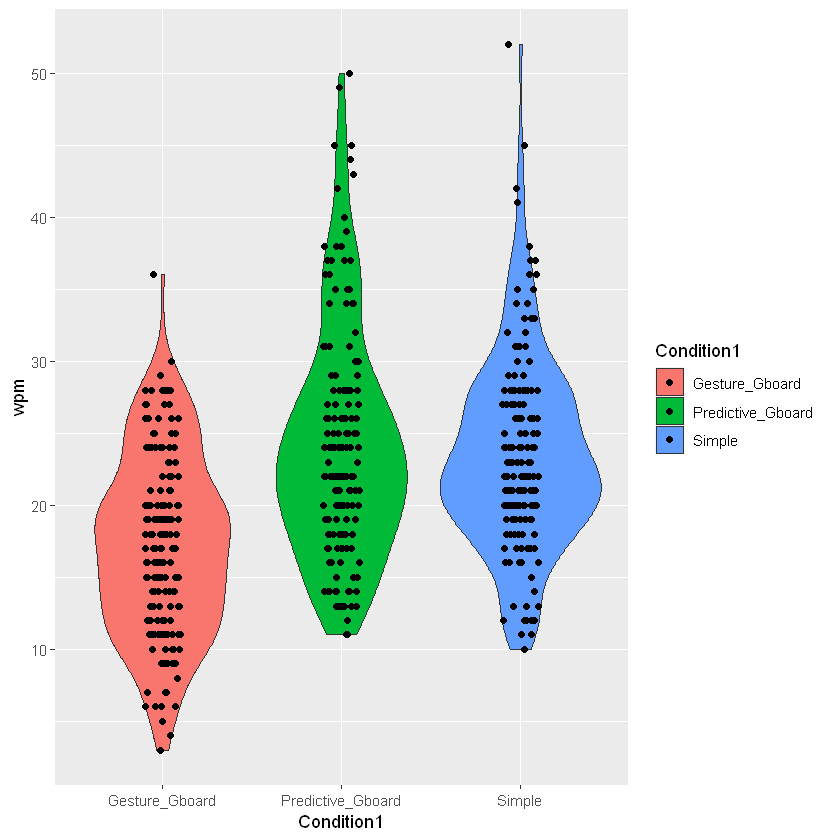

In [55]:
ggplot(data, aes(x=Condition1, y=wpm, fill=Condition1)) + 
  geom_violin() + geom_jitter(height = 0, width = 0.1)

Ce violin plot confirme ce que nous avons vu avec l'autre visualisation. Le nombre de mot par minute semble significativement plus bas pour le Gesture GBoard

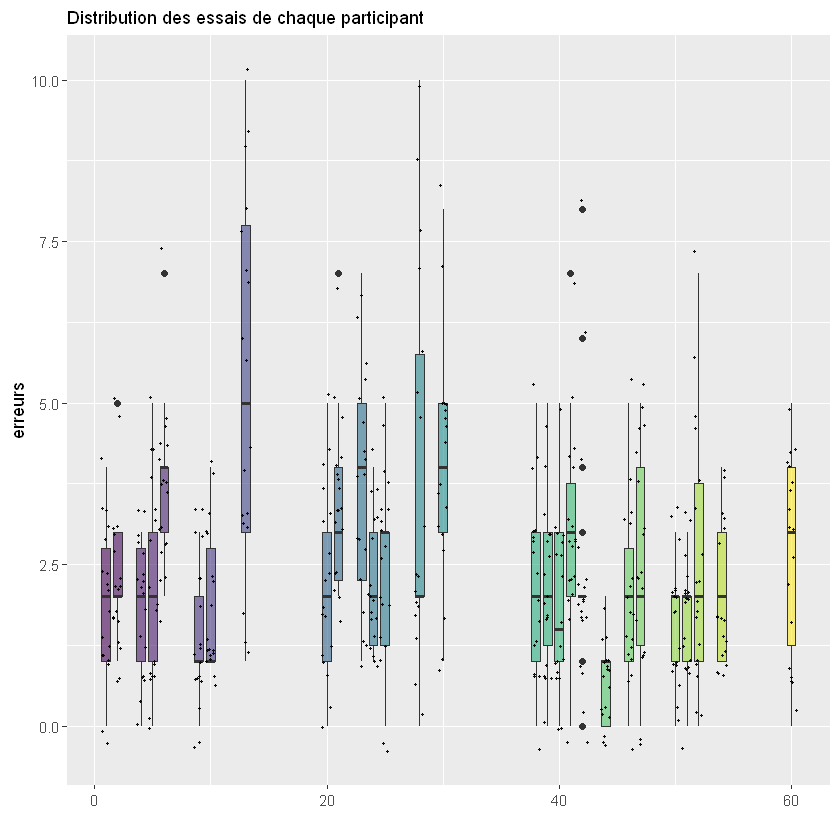

In [56]:
data %>%
  ggplot( aes(x=ParticipantID, y=erreurs, fill=ParticipantID, group=ParticipantID)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = FALSE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    #theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Distribution des essais de chaque participant") +
    xlab("")

On remarque que deux utilisateurs ont un nombre d'erreurs beaucoup plus élever que les autres. On peut donc se demander si cela vient d'un problème lors de l'expérimentation (participants pas assez concentrés ...) ou si c'est un échantillon représentatif.

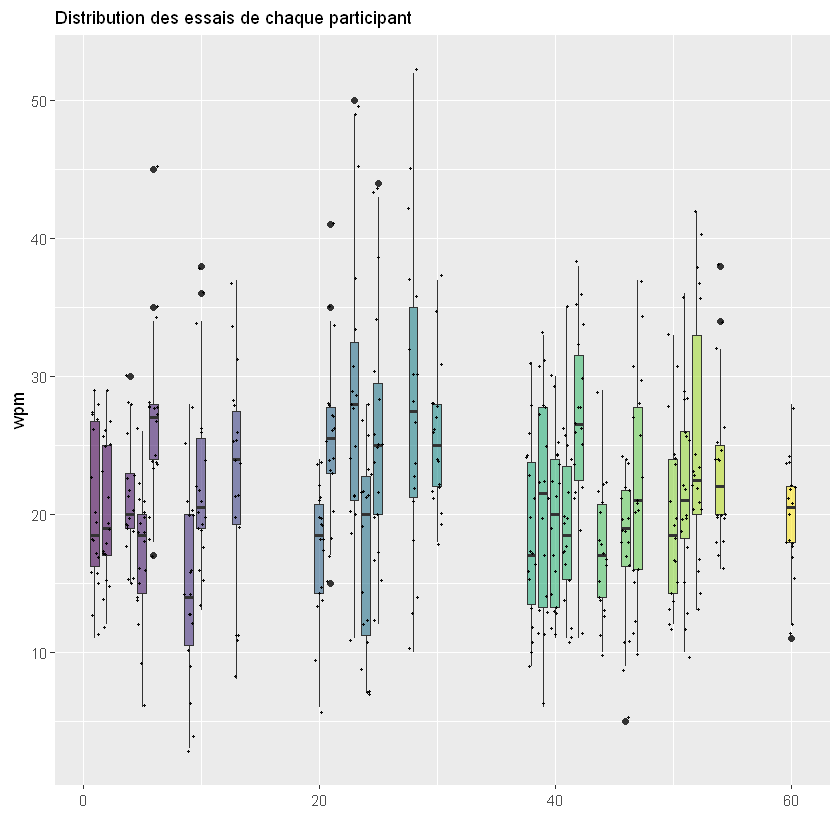

In [58]:
data %>%
  ggplot( aes(x=ParticipantID, y=wpm, fill=ParticipantID, group=ParticipantID)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = FALSE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    #theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Distribution des essais de chaque participant") +
    xlab("")

On remarque ici que le wpm est à peu près dans les même ordre de grandeur entre les différents participants. Cependant, on remarque une très grande variance de wpm pour un participant donné (cela peut s'expliquer en partie par le fait qu'on affiche toutes les données pour tous les types de claviers)

## Normalité des données

### Analyse visuelle de la distribution des données

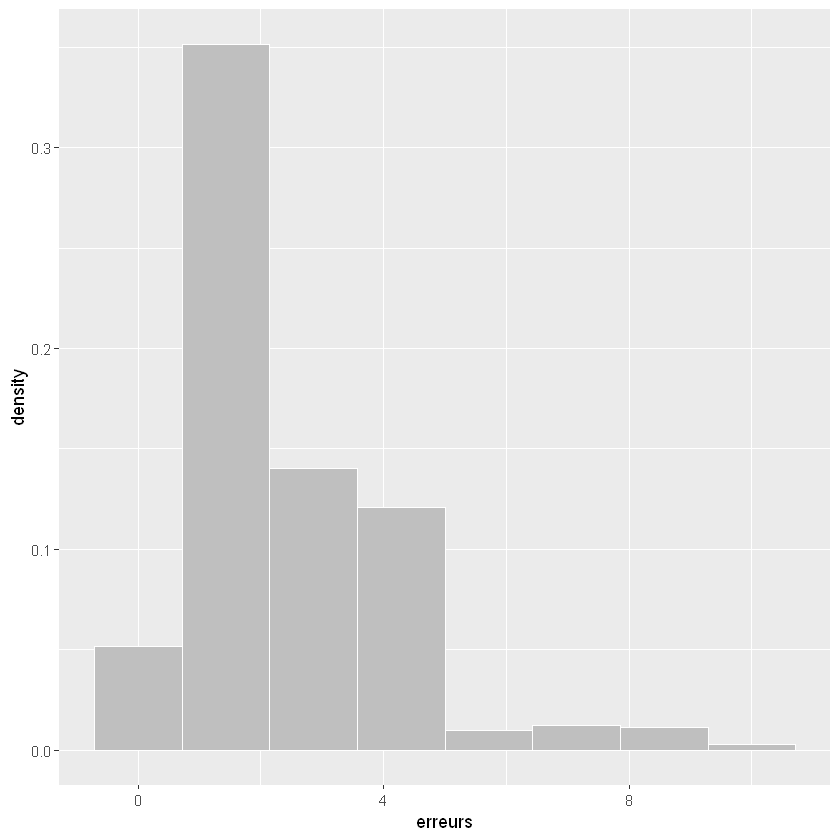

In [60]:
ggplot(data, aes(x = erreurs)) + 
    geom_histogram(aes(y =..density..), 
                   bins=8, # or specify manually : breaks = seq(0, 60, by = 10), 
                   colour = "white", fill="grey75")

Comme ce que l'on avait dit précédemment, que quelques participants ont eu un nombre d'erreurs très élevés.

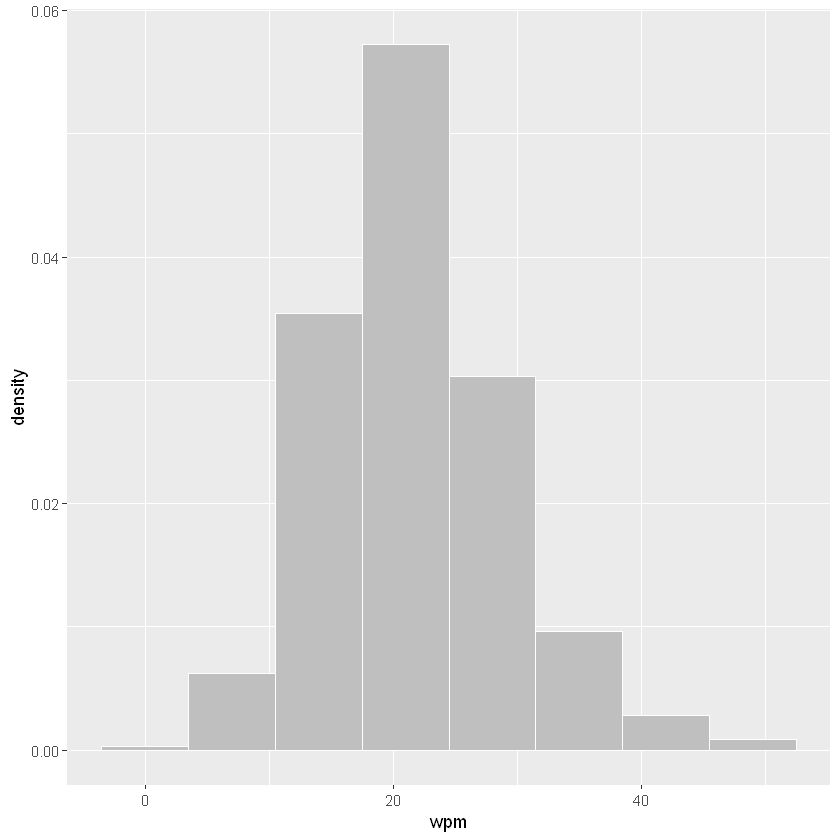

In [61]:
ggplot(data, aes(x = wpm)) + 
    geom_histogram(aes(y =..density..), 
                   bins=8, # or specify manually : breaks = seq(0, 60, by = 10), 
                   colour = "white", fill="grey75")

On remarque ici que la répartition est plus uniforme. 

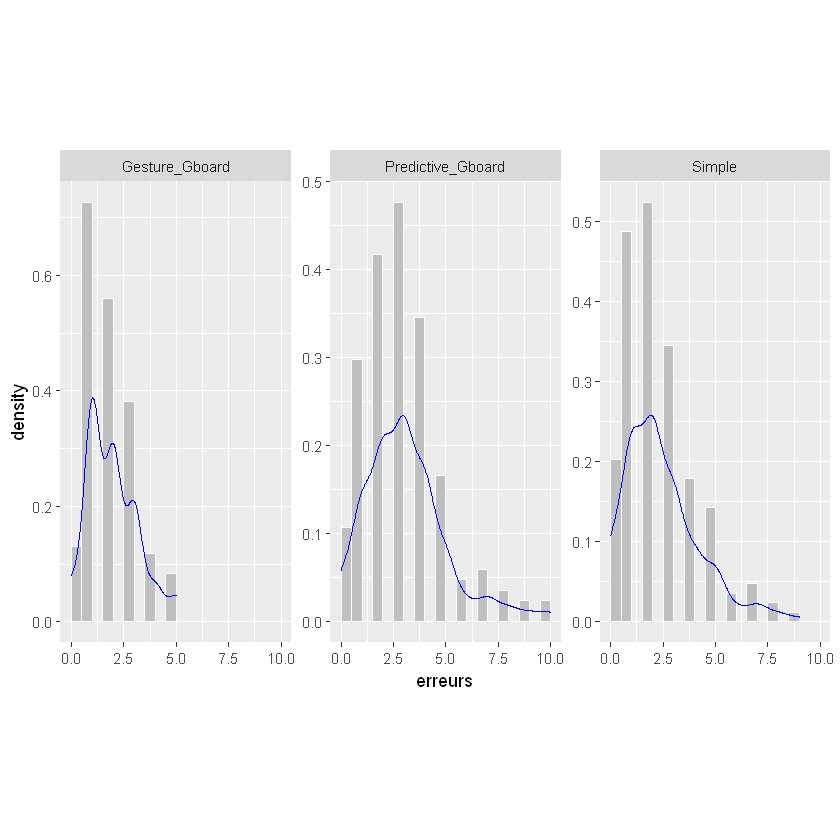

In [62]:
ggplot(data, aes(x=erreurs)) + 
  geom_histogram(aes(y=..density..), breaks = seq(0, 10, by = 0.5), colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue")  +
  theme(aspect.ratio=2)

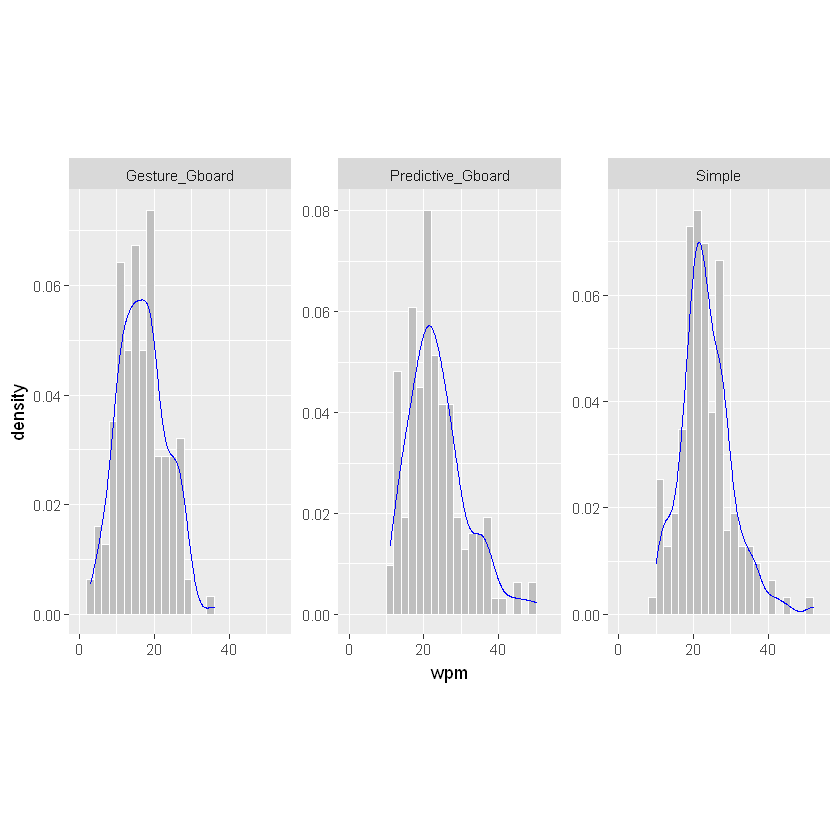

In [37]:
ggplot(data, aes(x=wpm)) + 
  geom_histogram(aes(y=..density..), breaks = seq(0, 55, by = 2), colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue")  +
  theme(aspect.ratio=2)

Le wpm semble suivre une distribution normale pour les trois claviers

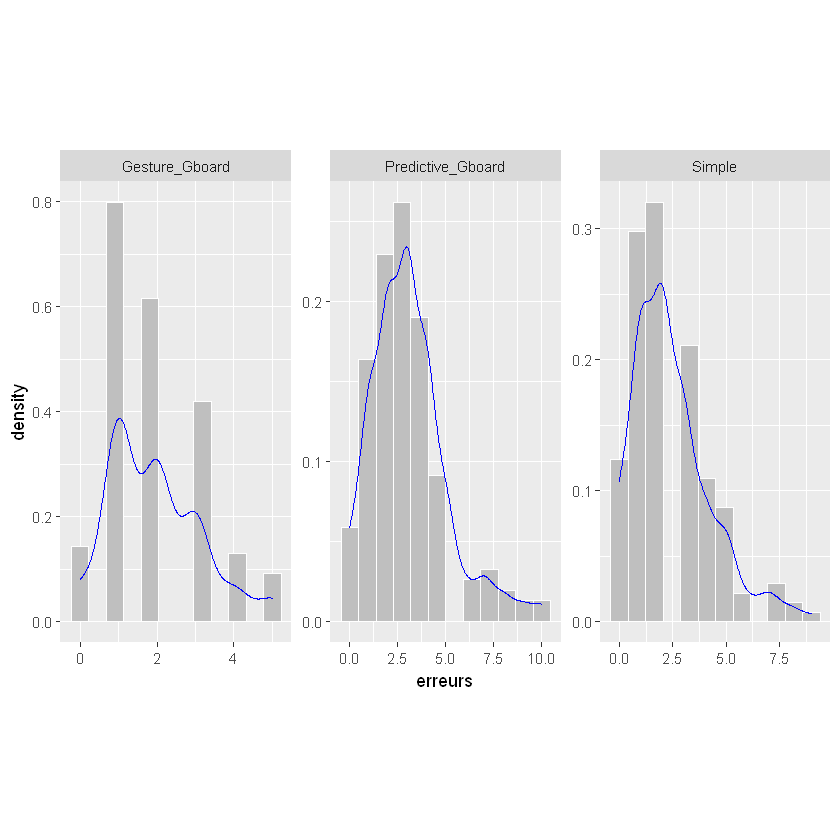

In [63]:
ggplot(data, aes(x=erreurs)) + 
  geom_histogram(aes(y=..density..), bins=12, colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue") +
  theme(aspect.ratio=2)

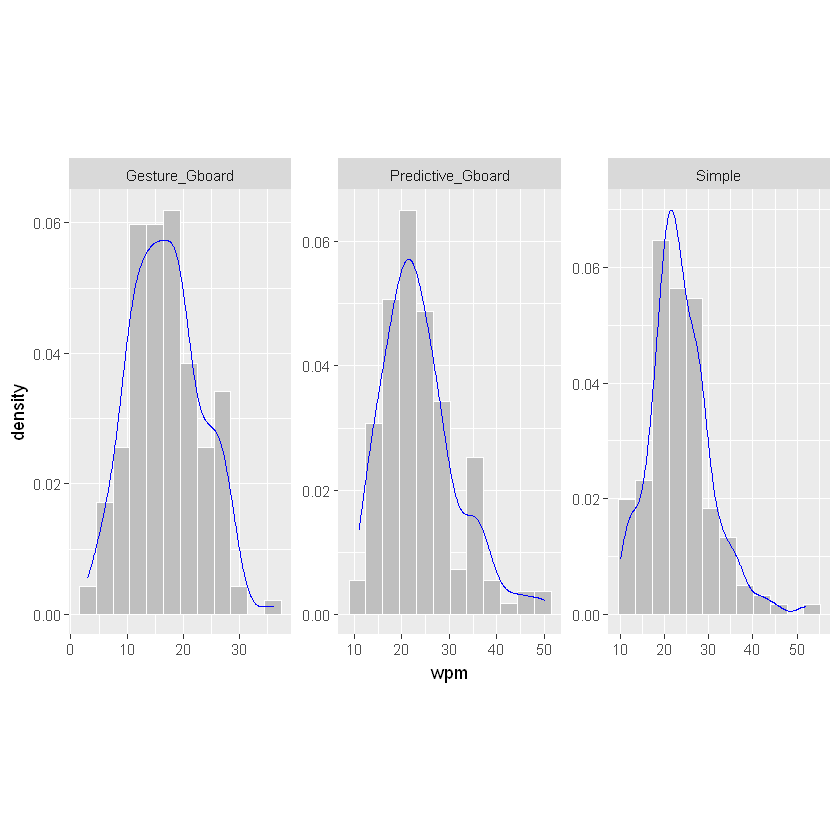

In [39]:
ggplot(data, aes(x=wpm)) + 
  geom_histogram(aes(y=..density..), bins=12, colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue") +
  theme(aspect.ratio=2)

### qqplot

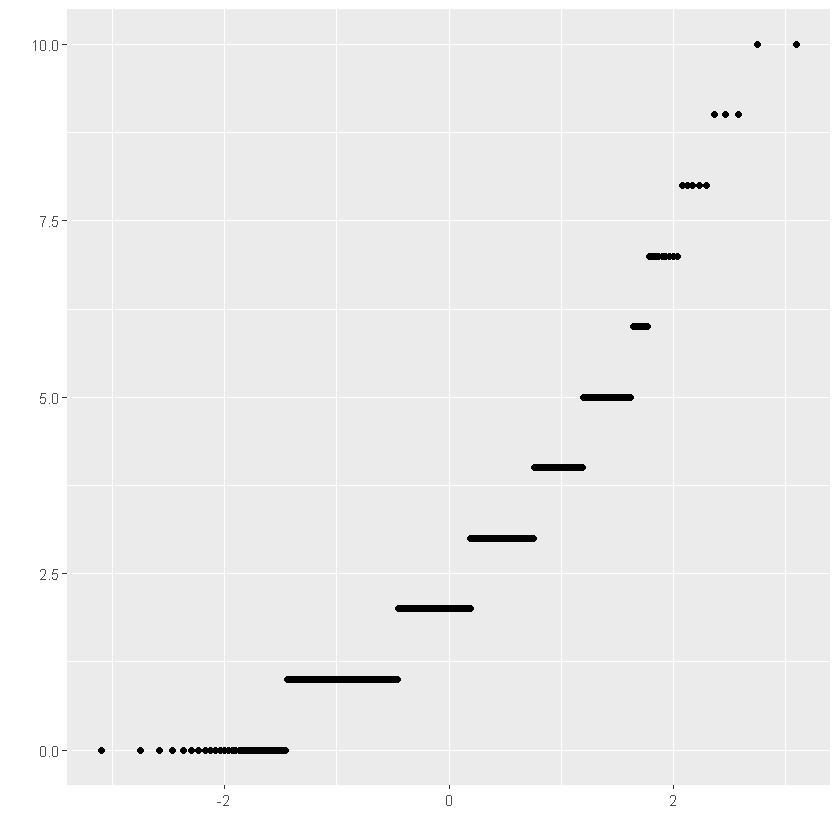

In [64]:
qplot(sample = erreurs, data = data, geom = "qq")

Ici on remarque que la distribution n'est pas tout à fait normale

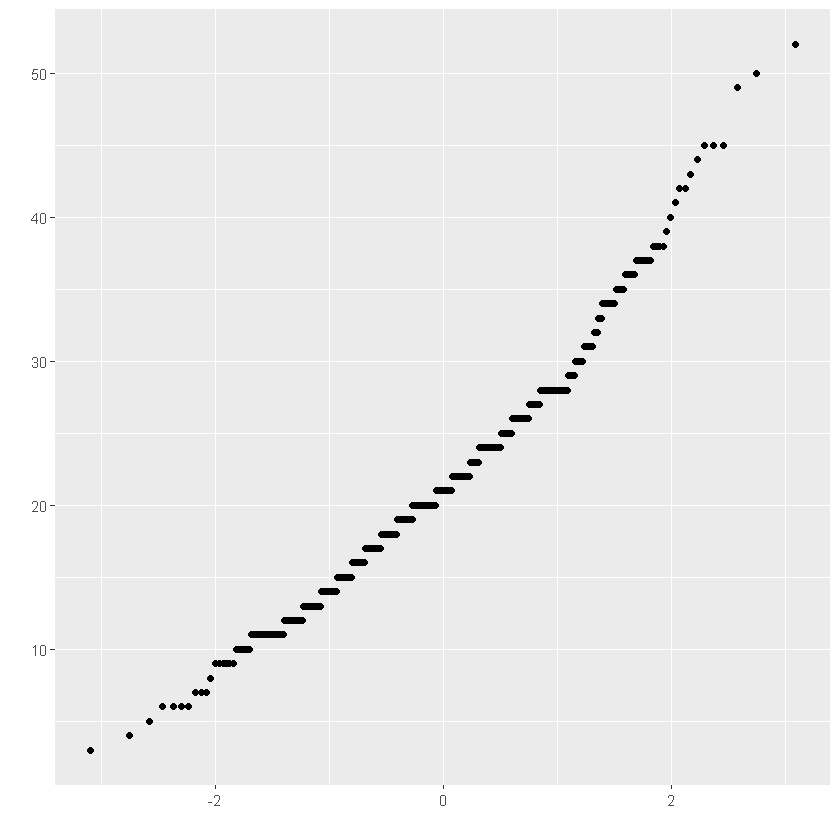

In [65]:
qplot(sample = wpm, data = data, geom = "qq")

La distribution selon le WPM suit une loi normale comme on peut l'observer (car on observe une droite)

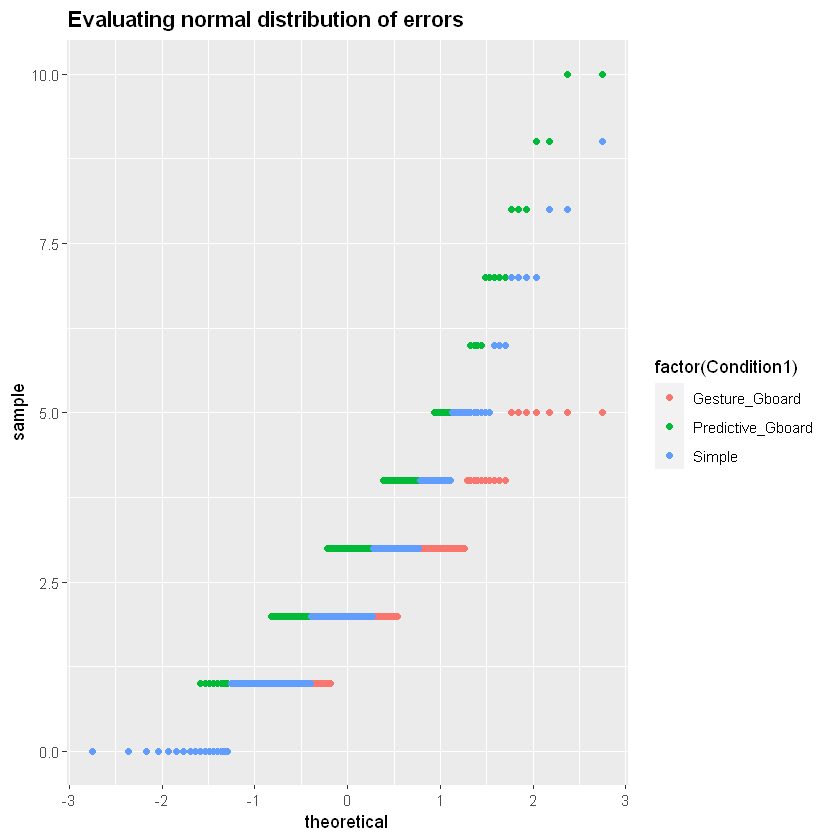

In [66]:
ggplot(data) +
        ggtitle("Evaluating normal distribution of errors") +
        theme(plot.title = element_text(lineheight = .8, face = "bold")) +
        stat_qq(aes(sample = erreurs, color = factor(Condition1)))

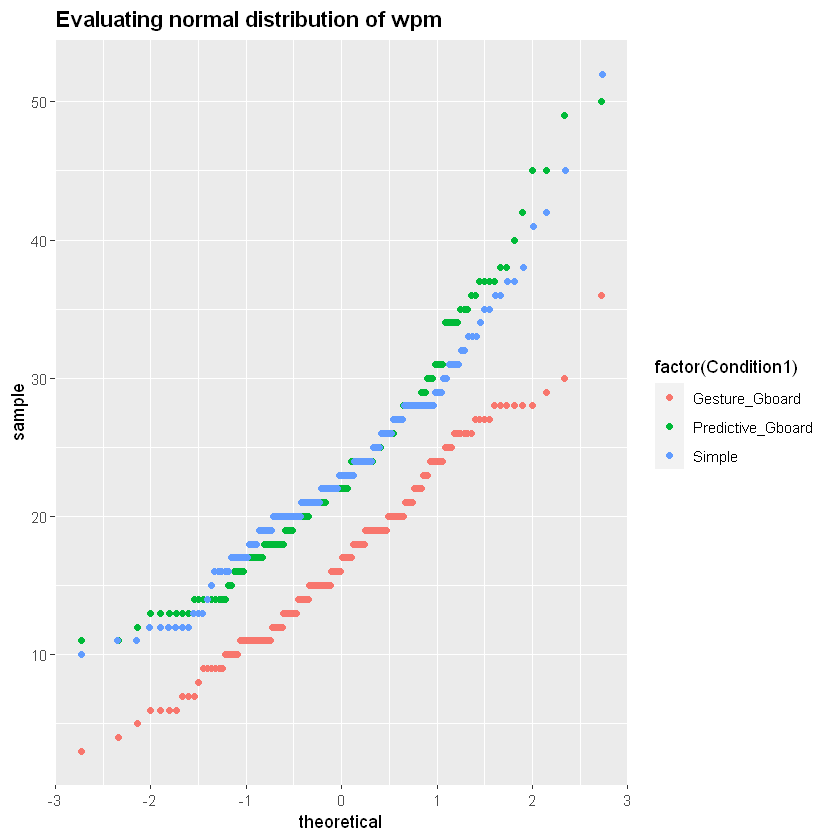

In [45]:
ggplot(data) +
        ggtitle("Evaluating normal distribution of wpm") +
        theme(plot.title = element_text(lineheight = .8, face = "bold")) +
        stat_qq(aes(sample = wpm, color = factor(Condition1)))

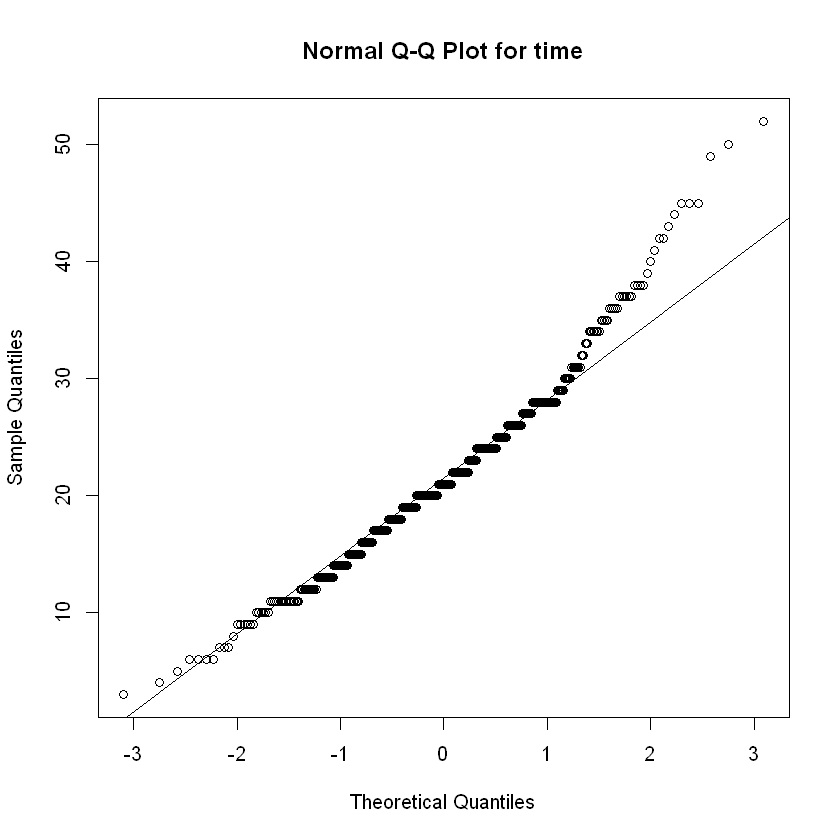

In [68]:
qqnorm(data$wpm, main = "Normal Q-Q Plot for time")
qqline(data$wpm)

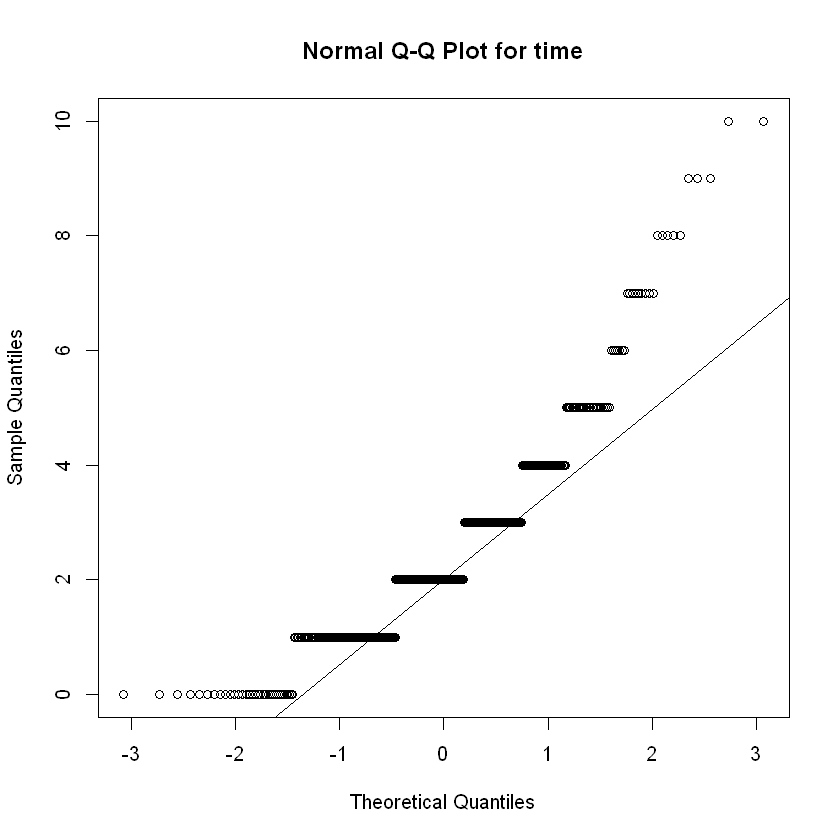

In [47]:
qqnorm(data$erreurs, main = "Normal Q-Q Plot for time")
qqline(data$erreurs)

L'erreur ne semble pas suivre une distribution normale

In [87]:
shapiro.test(data$wpm)


	Shapiro-Wilk normality test

data:  data$wpm
W = 0.97315, p-value = 5.495e-08


In [88]:
shapiro.test(data$erreurs)


	Shapiro-Wilk normality test

data:  data$erreurs
W = 0.89167, p-value < 2.2e-16


En vue des résultats précédents ils semblent plus pertinant de comparer les wpm de Gesture Gboard et de Predictive Gboard 

## Analyse Gesture Board et Predictive Board pour le WPM

In [69]:
head(data)

ParticipantID,TrialID,Block1,Block2,Condition1,Condition2,wpm,erreurs,Correct.words,Keystrokes,TÃ.lÃ.phone
1,1,1,1,Gesture_Gboard,Deux_mains,15,1,8,32,Samsung A7
1,2,1,1,Gesture_Gboard,Deux_mains,27,2,14,70,Samsung A7
1,3,1,1,Gesture_Gboard,Deux_mains,26,0,12,63,Samsung A7
1,4,1,2,Gesture_Gboard,Main_dominante,19,4,10,41,Samsung A7
1,5,1,2,Gesture_Gboard,Main_dominante,28,2,16,78,Samsung A7
1,6,1,2,Gesture_Gboard,Main_dominante,29,0,18,74,Samsung A7


### Paired t-test

In [83]:
t.test(data[data["Condition1"]=="Gesture_Gboard",7], data[data["Condition1"]=="Predictive_Gboard",7], paired = TRUE)


	Paired t-test

data:  data[data["Condition1"] == "Gesture_Gboard", 7] and data[data["Condition1"] == "Predictive_Gboard", 7]
t = -9.4834, df = 167, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.471653 -5.552157
sample estimates:
mean of the differences 
              -7.011905 


On observe une différence de WPM statistiquement significative (pvalue<0.5) entre Predictive Board et Gesture Board, et cette différence est en moyenne de 7.

### Test de signifiance avec Anova

In [90]:
data$method = factor(data$Condition1)
data$subject = factor(data$ParticipantID)

In [91]:
results = afex::aov_ez(
  data = data, 
  id = 'ParticipantID', # subject id column
  dv = 'wpm', # dependent variable
  within = c('Condition1'), # within-subject independent variables
  between = NULL ,# between-subject independent variables
  fun_aggregate = mean, # average multiple repetitions together for each subject*condition
  anova_table = list(es = 'ges') # effect size = generalized eta squared
)
results

Anova Table (Type 3 tests)

Response: wpm
      Effect          df   MSE         F  ges p.value
1 Condition1 1.61, 43.50 17.92 28.94 *** .302   <.001
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1

Sphericity correction method: GG 

On remarque une différence significative de mots par minutes entre le Gboard Predictif et le Gesture GBoard